# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [2]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import pandas as pd
# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
#Find the shape of the housing_feature matrix to find the number of houses and the number of features
#in the dataset
[m, n] = housing_features.shape
# Number of houses in the dataset
total_houses = m

# Number of features in the dataset
total_features = n

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices, axis=0)

# Standard deviation of housing values of the dataset
std_dev = housing_prices.std()

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


Plot the median price distribution of the Housing Prices.

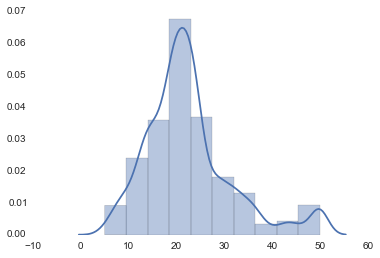

In [4]:
sns.distplot(housing_prices, bins=10);


In [6]:
boston_data = pd.read_csv("Boston_Housing.csv")

In [11]:
boston_data=boston_data.drop(boston_data.columns[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1, implace=True)

In [12]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
bostonCorr = boston_data.corr()

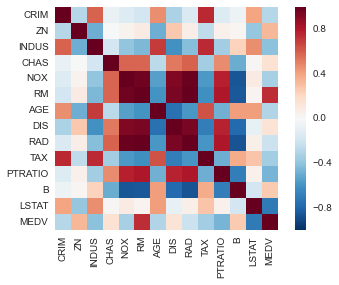

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(bostonCorr,square=True);

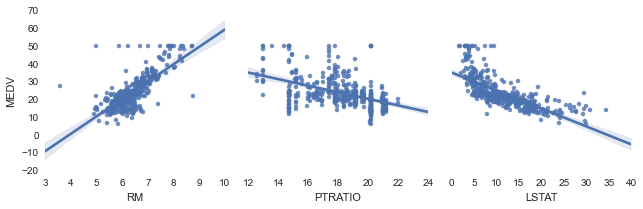

In [27]:
sns.pairplot(boston_data, x_vars=["RM","PTRATIO","LSTAT"], y_vars=["MEDV"], size =3 ,
             aspect=1, kind="reg");

In [22]:
bostonCorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.288969,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754362,-0.140015,-0.053260,0.392225,-0.286245
ZN,-0.288969,1.000000,-0.491587,-0.005843,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256799,0.049491,0.015810,-0.390092,0.331570
INDUS,0.586719,-0.491587,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748951,-0.351166,0.233471,0.465583,-0.411915
CHAS,-0.067536,-0.005843,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.523772,0.587673,-0.347552,0.470870,-0.495956,0.011260,0.154409
NOX,-0.139448,0.038450,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570346,0.775302,-0.856608,0.079688,-0.332778
RM,-0.185045,0.078721,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.610962,0.806522,-0.848289,0.029450,0.740181
AGE,0.462470,-0.488006,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635697,-0.477048,0.417216,0.414354,-0.299893
DIS,-0.312843,0.268317,-0.605973,0.523772,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689224,0.766224,-0.778075,-0.080368,0.138798
RAD,-0.151996,0.062767,-0.427834,0.587673,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586540,0.805556,-0.861694,0.056185,-0.217902
TAX,0.754362,-0.256799,0.748951,-0.347552,-0.570346,-0.610962,0.635697,-0.689224,-0.586540,1.000000,-0.485166,0.372806,0.284030,-0.345898


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

The three features I think are significant are as follows
RM: average number of rooms per dwelling
PTRATIO :  pupil-teacher ratio by town
LSTAT       : % lower status of the population.
In order to determine the significance of these features I created the corelation matrix of each feature. As seen from the corelation matrix the features RM has a positive corelation with MEDV (Medican Value) and PTRATIO and LSTAT have negative corelation.
In order to understand this better a linear regression graph of these features were plotted against the MEDV target value. 
This regression of the three variables plotted against the median value indicates that the median value increases with increase in the average number of rooms.
Median value decreases with an increase in the pupil teacher ratio. The higher pupil teacher ratio indicates a not so good schooling district.
The LSTAT indicates the percent of lower status of the population or lower income group and the negative corelation indictes that increase in the percent of lower status of the population the median value of decreases.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [53]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

RM = 5.609
PTRATIO= 20.2
LSTAT = 12.13

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [55]:
# Put any import statements you need for this code block here
import sklearn as sk
from sklearn import cross_validation
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    
    
    # Shuffle and split the data
    
    #X_train = [X[train_index] for train_index in cv]
    #y_train = None
    #X_test = None
    #y_test = None
    X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(X, y, test_size=0.30, random_state=42)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

 Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

During a machine learning process one builds a machine learning model on a given data set. One is training models based on this data set. Once this model has been optimized on the existing data set , this model might not perform very well on a new data set. We might get very high accuracy on the data set on which the model was trained and very poor accuracy on an entirely new data set. In order to elliminate this behaviour we need to split the data set into a training set and a test set. By doing so we build and train the machine learning algorithm on a subset of data set and then evaluate the model on the test set. By doing this we elliminate bias or variance in the machine learning model. By splitting a data set into training and test set we can build a model that would perform well on both the subsets training and test set and also on any new data that we get later. 
In short the splitting of the data set into training and test set elliminates the problem of overfitting and generalizes the model better.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [60]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

Mean Squared Error (MSE) or the Mean Absolute Error (MAE) are two most appropriate performance meterics that can be used for predicting housing prices. In my model I have used Mean Squared Error (MSE) as the performance metric. The other performance metrics are more appropriate for classification problems.
Mean Squared error takes into account both the bias and the variance of the model. It provides a balance between the two. Mean Squared error is given by
MSE = Bais^2 + Variance.
By minimizing MSE we tend to get a balance between the bais and variance and hence we would develop a machine learning model that genelarizes the data well.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [66]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better= False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring = scoring_function , cv=10)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

In building machine learning models,certain parameters need to be specified outside the training procedure. Examples of such parameters are maximum depth of decision tree, regularization parameters etc. If the range of parameters is big trying to find the best model is a cumbersome task. Grid search algorithm comes to our resue here.
Grid search algorithm picks the parameters, evaluates every one of them and returns the estimator with the best parameters. 

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

Cross-validation is technique for model validation. Cross-validation is used in building an optimized machine learning model in order to limit overfitting problems. 
Cross-validation involves splitting data sets into training, validation and test data. Once a model is trained on a training set, the model perfomance is evaluated on the cross-vlaidation set. The model is tuned based on the performance metric obtained on the cross-validation set. Multiple of rounds of cross-validation is performed using different pertitions (K-fold technique) and the validated results are averaged over the rounds to obtain the final model.
Cross-validation in general averages the error and comes up with an accurate estimate of the model perfomance.
Cross-validation is generally perfomred when the data set is small or if there is no distribution and spread of data. Cross-validation can and also used on large data sets. 
In short cross-validation is a powerful technique in estimating machine learning model performance.


# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [67]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [68]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\aw634c\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


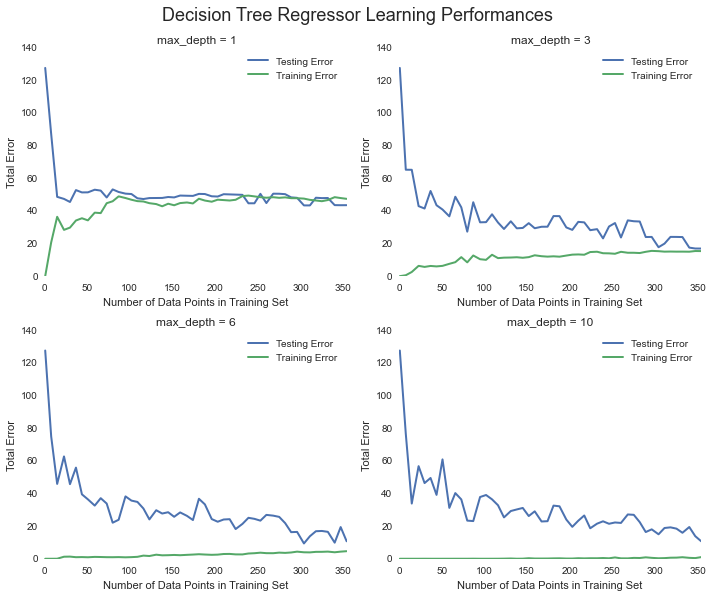

In [69]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

Max_depth = 6 is the chosed model of choice for this question.
As seen in the graph as the number of training set increase the training error also increases but albeit slowly and slope is small. The testing error as compared to the training error decreases rapidly as the number of data points increase. This indicates that as more and more data is provided the testing error would decrease and the model performance increases.
The saying that the company or person having the largest amount of data wins as compared to the machine learning algorithm is true in this case.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

Creating a model complexity graph. . . 


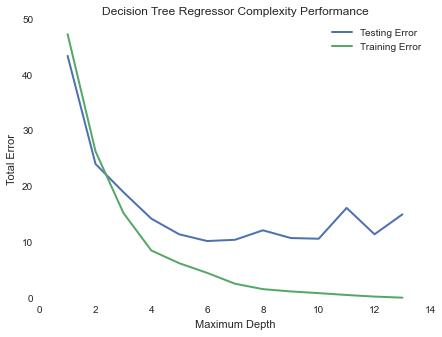

In [70]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

Looking at the plot of Maximum Depth VS Total Error it is appropriate to use max depth between 4 to 6.
As seen from the graph the training error and testing error decreases as we increase the depth of the decision tree. We also notice as the depth increases beyond 6 the training error continues to decrease but the testing error starts to increase. This is the region of overfitting. Models that we choose beyond a depth of 6 would over fit the data and would perform badly on the test data.
Similarly if we choose depth below 4 this would produce a model with high bias and it would underfit the model. In order to balance between underfit and overfit chossing a depth between 4 to 6 would give us a model that would generalize over the complete data set.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [71]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 6


The optimal max_depth parameter for the model is 6. Any number higher then this would overfit the model. The model with a depth of 3 would underfit the model according to my observation.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [72]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

Althought this model does underpredicts, this model is good model to start. In order to improve the model performance we could add more features to the existing model and use L1, L2 or elastic net regularization models. 
Using regulization would help us over come the overfitting of the model and also help us in imporving the perfomance of our model.